## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
# 改成多用momentum
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.85, 0.7]
NEST = [True,False]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for mont in MOMENTUM:
    for nest in NEST:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.2f and nesterov = %s" % (mont,nest))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nest, momentum=mont)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-mont-%s and nesterov- %s" % (str(mont),str(nest))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.95 and nesterov = True
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 2s 1

196/196 [==============================] - 3s 13ms/step - loss: 0.3578 - accuracy: 0.8713 - val_loss: 2.4023 - val_accuracy: 0.5141
Experiment with MOMENTUM = 0.95 and nesterov = False
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable p

196/196 [==============================] - 2s 13ms/step - loss: 0.6308 - accuracy: 0.7734 - val_loss: 1.7494 - val_accuracy: 0.5188
Epoch 50/50
196/196 [==============================] - 3s 13ms/step - loss: 0.6074 - accuracy: 0.7807 - val_loss: 1.7947 - val_accuracy: 0.5290
Experiment with MOMENTUM = 0.85 and nesterov = True
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________________________________

196/196 [==============================] - 3s 13ms/step - loss: 0.5640 - accuracy: 0.8034 - val_loss: 1.7043 - val_accuracy: 0.5247
Epoch 49/50
196/196 [==============================] - 2s 13ms/step - loss: 0.5488 - accuracy: 0.8068 - val_loss: 1.7018 - val_accuracy: 0.5208
Epoch 50/50
196/196 [==============================] - 3s 13ms/step - loss: 0.5313 - accuracy: 0.8137 - val_loss: 1.8897 - val_accuracy: 0.5036
Experiment with MOMENTUM = 0.85 and nesterov = False
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________

196/196 [==============================] - 2s 12ms/step - loss: 0.6830 - accuracy: 0.7580 - val_loss: 1.5308 - val_accuracy: 0.5288
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6594 - accuracy: 0.7656 - val_loss: 1.5351 - val_accuracy: 0.5449
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6487 - accuracy: 0.7699 - val_loss: 1.5900 - val_accuracy: 0.5385
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6299 - accuracy: 0.7781 - val_loss: 1.6873 - val_accuracy: 0.5187
Experiment with MOMENTUM = 0.70 and nesterov = True
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________________

196/196 [==============================] - 2s 13ms/step - loss: 0.8887 - accuracy: 0.6898 - val_loss: 1.4551 - val_accuracy: 0.5183
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8803 - accuracy: 0.6900 - val_loss: 1.4860 - val_accuracy: 0.4990
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8710 - accuracy: 0.6936 - val_loss: 1.5174 - val_accuracy: 0.5062
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8524 - accuracy: 0.7018 - val_loss: 1.5107 - val_accuracy: 0.5072
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8476 - accuracy: 0.7038 - val_loss: 1.4387 - val_accuracy: 0.5264
Experiment with MOMENTUM = 0.70 and nesterov = False
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
___________________

196/196 [==============================] - 2s 12ms/step - loss: 0.8928 - accuracy: 0.6871 - val_loss: 1.5358 - val_accuracy: 0.5021
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8771 - accuracy: 0.6907 - val_loss: 1.4227 - val_accuracy: 0.5290
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8670 - accuracy: 0.6964 - val_loss: 1.4135 - val_accuracy: 0.5275
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8510 - accuracy: 0.7033 - val_loss: 1.3589 - val_accuracy: 0.5397
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8419 - accuracy: 0.7033 - val_loss: 1.4463 - val_accuracy: 0.5260
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8248 - accuracy: 0.7112 - val_loss: 1.3973 - val_accuracy: 0.5390


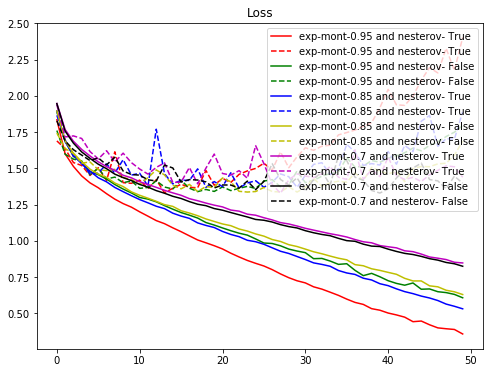

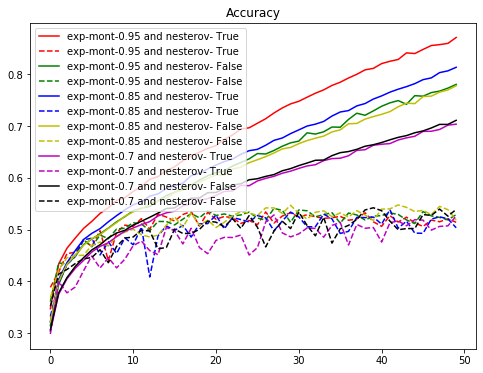

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()